# ANALISIS DE LA TEMPORADA 2023-24 DE LA NBA 

![M](https://cdn.vox-cdn.com/thumbor/uixUjsa2iQpUVZe0YEZz4M-SDWM=/0x0:3700x2000/1320x743/filters:focal(1554x704:2146x1296):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/73250503/hundred_picks_getty_ringer_2.0.jpg)

# Objetivo
Analizar la relación entre el salario de los jugadores, sus posiciones en el campo de juego y sus edades para identificar tendencias y patrones que puedan ser utilizados para la toma de decisiones estratégicas en la gestión de equipos o los mismos jugadores.

# Estado del Arte

https://projects.fivethirtyeight.com/nba-player-ratings/

https://www.bball-index.com/lebron-database/

https://projects.fivethirtyeight.com/2023-nba-player-projections/


# Dataset

https://www.basketball-reference.com/contracts/players.html


In [2]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.io as pio

# Cargamos los dataframes
salary = pd.read_csv("SALARY.csv")
stats = pd.read_csv("DATAT2.csv")

# Función para poder visualizar todas las columnas dentro del notebook
pd.set_option('display.max_columns', None)

# Limpieza

In [3]:
# Index, Player, Equipo, 2023-24, 2024-25, 2025-26, 2026-27, 2027-28, 2028-29, Total, slugPlayerBREF
print("salary:\n", salary.columns)
print("stats:\n", stats.columns)

salary:
 Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Salary', 'Salary.1',
       'Salary.2', 'Salary.3', 'Salary.4', 'Salary.5', 'Unnamed: 9',
       '-additional'],
      dtype='object')
stats:
 Index(['Unnamed: 0', 'slugSeason', 'yearSeason', 'isSeasonCurrent',
       'slugPlayerSeason', 'slugPlayerBREF', 'namePlayer', 'slugPosition',
       'agePlayer', 'slugTeamBREF', 'countGames', 'countGamesStarted', 'pctFG',
       'pctFG3', 'pctFG2', 'pctEFG', 'pctFT', 'isHOFPlayer', 'slugTeamsBREF',
       'idPlayerNBA', 'urlPlayerThumbnail', 'urlPlayerHeadshot',
       'urlPlayerPhoto', 'urlPlayerStats', 'urlPlayerActionPhoto',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals'],
      dtype='object')


In [4]:
salary.head(4)

Unnamed: 0     Unnamed: 1 Unnamed: 2     Salary   Salary.1   Salary.2  \
0         Rk         Player         Tm    2023-24    2024-25    2025-26   
1        NaN            NaN        NaN        NaN        NaN        NaN   
2          1  Stephen Curry        GSW  $51915615  $55761216  $59606817   
3          2   Kevin Durant        PHO  $47649433  $51179021  $54708609   

  Salary.3 Salary.4 Salary.5  Unnamed: 9 -additional  
0  2026-27  2027-28  2028-29  Guaranteed       -9999  
1      NaN      NaN      NaN         NaN       -9999  
2      NaN      NaN      NaN  $167283648   curryst01  
3      NaN      NaN      NaN  $153537063   duranke01

<holamundo>

In [5]:
stats.head(4)

Unnamed: 0 slugSeason  yearSeason  isSeasonCurrent slugPlayerSeason  \
0           1    2023-24        2023            False   achiupr01_2024   
1           2    2023-24        2023            False   adebaba01_2024   
2           3    2023-24        2023            False   agbajoc01_2024   
3           4    2023-24        2023            False   aldamsa01_2024   

  slugPlayerBREF        namePlayer slugPosition  agePlayer slugTeamBREF  \
0      achiupr01  Precious Achiuwa         PF-C         24          TOT   
1      adebaba01       Bam Adebayo            C         26          MIA   
2      agbajoc01      Ochai Agbaji           SG         23          TOT   
3      aldamsa01      Santi Aldama           PF         23          MEM   

   countGames  countGamesStarted  pctFG  pctFG3  pctFG2  pctEFG  pctFT  \
0          74                 18  0.501   0.268   0.562   0.529  0.616   
1          71                 71  0.521   0.357   0.528   0.529  0.755   
2          78                 28  0.411   0.294   0.523   0.483  0.661   
3          61                 35  0.435   0.349   0.534   0.528  0.621   

   isHOFPlayer slugTeamsBREF  idPlayerNBA  \
0        False     TOR | NYK    1630173.0   
1        False           MIA    1628389.0   
2        False     UTA | TOR    1630534.0   
3        False           MEM    1630583.0   

                                  urlPlayerThumbnail  \
0  https://ak-static.cms.nba.com/wp-content/uploa...   
1  https://ak-static.cms.nba.com/wp-content/uploa...   
2  https://ak-static.cms.nba.com/wp-content/uploa...   
3  https://ak-static.cms.nba.com/wp-content/uploa...   

                                   urlPlayerHeadshot  \
0  https://ak-static.cms.nba.com/wp-content/uploa...   
1  https://ak-static.cms.nba.com/wp-content/uploa...   
2  https://ak-static.cms.nba.com/wp-content/uploa...   
3  https://ak-static.cms.nba.com/wp-content/uploa...   

                                      urlPlayerPhoto  \
0  https://stats.nba.com/media/img/league/nba-hea...   
1  https://ak-static.cms.nba.com/wp-content/uploa...   
2  https://stats.nba.com/media/img/league/nba-hea...   
3  https://stats.nba.com/media/img/league/nba-hea...   

                         urlPlayerStats  \
0  https://stats.nba.com/player/1630173   
1  https://stats.nba.com/player/1628389   
2  https://stats.nba.com/player/1630534   
3  https://stats.nba.com/player/1630583   

                                urlPlayerActionPhoto  minutesTotals  \
0  https://stats.nba.com/media/players/700/163017...           1624   
1  https://stats.nba.com/media/players/700/162838...           2416   
2  https://stats.nba.com/media/players/700/163053...           1641   
3  https://stats.nba.com/media/players/700/163058...           1618   

   fgmTotals  fgaTotals  fg3mTotals  fg3aTotals  fg2mTotals  fg2aTotals  \
0        235        469          26          97         209         372   
1        530       1017          15          42         515         975   
2        178        433          62         211         116         222   
3        247        568         106         304         141         264   

   ftmTotals  ftaTotals  orbTotals  drbTotals  trbTotals  astTotals  \
0         69        112        191        296        487         97   
1        292        387        159        578        737        278   
2         37         56         74        142        216         83   
3         54         87         72        280        352        138   

   stlTotals  blkTotals  tovTotals  pfTotals  ptsTotals  \
0         46         68         83       143        565   
1         81         66        162       159       1367   
2         47         44         64       117        455   
3         43         54         69        89        654   

   countTeamsPlayerSeasonTotals  
0                             1  
1                             1  
2                             1  
3                             1

In [6]:
# Nos quedamos con la fila Salario y su slugPlayerBREF
salary2 = salary[["Salary", "-additional"]]

# Renombramos "-additional" a "slugPlayerBREF"
salary2 = salary2.rename(columns = {'-additional':'slugPlayerBREF'})
salary2.head(5)

Salary slugPlayerBREF
0    2023-24          -9999
1        NaN          -9999
2  $51915615      curryst01
3  $47649433      duranke01
4  $47607350      jokicni01

In [7]:
# Quitamos filas que contengan 1 o más valores NULL
salary2 = salary2.dropna()

# Eliminamos la primera fila
salary2 = salary2.drop([0])
salary2.head(5)

Salary slugPlayerBREF
2  $51915615      curryst01
3  $47649433      duranke01
4  $47607350      jokicni01
5  $47607350      embiijo01
6  $47607350      jamesle01

In [8]:
# Remover $ de la columna Salario para todas las filas
salary2['Salary'] = salary2['Salary'].replace('[\$]', '', regex=True).astype(int)
salary2.head(5)

Salary slugPlayerBREF
2  51915615      curryst01
3  47649433      duranke01
4  47607350      jokicni01
5  47607350      embiijo01
6  47607350      jamesle01

In [9]:
# Juntamos salary2 y stats en 1 dataset
SS = pd.merge(salary2, stats,how='inner', on='slugPlayerBREF')
SS.head(3)

Salary slugPlayerBREF  Unnamed: 0 slugSeason  yearSeason  \
0  51915615      curryst01         114    2023-24        2023   
1  47649433      duranke01         138    2023-24        2023   
2  47607350      jokicni01         264    2023-24        2023   

   isSeasonCurrent slugPlayerSeason     namePlayer slugPosition  agePlayer  \
0            False   curryst01_2024  Stephen Curry           PG         35   
1            False   duranke01_2024   Kevin Durant           PF         35   
2            False   jokicni01_2024   Nikola Jokic            C         28   

  slugTeamBREF  countGames  countGamesStarted  pctFG  pctFG3  pctFG2  pctEFG  \
0          GSW          74                 74  0.450   0.408   0.515   0.573   
1          PHO          75                 75  0.523   0.413   0.567   0.581   
2          DEN          79                 79  0.583   0.359   0.626   0.612   

   pctFT  isHOFPlayer slugTeamsBREF  idPlayerNBA  \
0  0.923        False           GSW     201939.0   
1  0.856        False           PHO     201142.0   
2  0.817        False           DEN     203999.0   

                                  urlPlayerThumbnail  \
0  https://stats.nba.com/media/players/230x185/20...   
1  https://stats.nba.com/media/players/230x185/20...   
2  https://stats.nba.com/media/players/230x185/20...   

                                   urlPlayerHeadshot  \
0  https://ak-static.cms.nba.com/wp-content/uploa...   
1  https://ak-static.cms.nba.com/wp-content/uploa...   
2  https://ak-static.cms.nba.com/wp-content/uploa...   

                                      urlPlayerPhoto  \
0  https://ak-static.cms.nba.com/wp-content/uploa...   
1  https://ak-static.cms.nba.com/wp-content/uploa...   
2  https://ak-static.cms.nba.com/wp-content/uploa...   

                        urlPlayerStats  \
0  https://stats.nba.com/player/201939   
1  https://stats.nba.com/player/201142   
2  https://stats.nba.com/player/203999   

                                urlPlayerActionPhoto  minutesTotals  \
0  https://stats.nba.com/media/players/700/201939...           2421   
1  https://stats.nba.com/media/players/700/201142...           2791   
2  https://stats.nba.com/media/players/700/203999...           2737   

   fgmTotals  fgaTotals  fg3mTotals  fg3aTotals  fg2mTotals  fg2aTotals  \
0        650       1445         357         876         293         569   
1        751       1436         168         407         583        1029   
2        822       1411          83         231         739        1180   

   ftmTotals  ftaTotals  orbTotals  drbTotals  trbTotals  astTotals  \
0        299        324         37        293        330        379   
1        362        423         41        454        495        378   
2        358        438        223        753        976        708   

   stlTotals  blkTotals  tovTotals  pfTotals  ptsTotals  \
0         54         28        210       117       1956   
1         69         91        244       133       2032   
2        108         68        237       194       2085   

   countTeamsPlayerSeasonTotals  
0                             1  
1                             1  
2                             1

In [10]:
SS.columns

Index(['Salary', 'slugPlayerBREF', 'Unnamed: 0', 'slugSeason', 'yearSeason',
       'isSeasonCurrent', 'slugPlayerSeason', 'namePlayer', 'slugPosition',
       'agePlayer', 'slugTeamBREF', 'countGames', 'countGamesStarted', 'pctFG',
       'pctFG3', 'pctFG2', 'pctEFG', 'pctFT', 'isHOFPlayer', 'slugTeamsBREF',
       'idPlayerNBA', 'urlPlayerThumbnail', 'urlPlayerHeadshot',
       'urlPlayerPhoto', 'urlPlayerStats', 'urlPlayerActionPhoto',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals'],
      dtype='object')

In [11]:
# Eliminamos columnas inecesarias
SS = SS.drop(columns=['slugPlayerBREF', 'Unnamed: 0', 'slugSeason', 'yearSeason',
       'isSeasonCurrent', 'slugPlayerSeason', 'idPlayerNBA', 'urlPlayerThumbnail', 
       'urlPlayerHeadshot', 'urlPlayerPhoto', 'urlPlayerStats', 'urlPlayerActionPhoto', 
       'countTeamsPlayerSeasonTotals', 'isHOFPlayer'])
SS.columns

Index(['Salary', 'namePlayer', 'slugPosition', 'agePlayer', 'slugTeamBREF',
       'countGames', 'countGamesStarted', 'pctFG', 'pctFG3', 'pctFG2',
       'pctEFG', 'pctFT', 'slugTeamsBREF', 'minutesTotals', 'fgmTotals',
       'fgaTotals', 'fg3mTotals', 'fg3aTotals', 'fg2mTotals', 'fg2aTotals',
       'ftmTotals', 'ftaTotals', 'orbTotals', 'drbTotals', 'trbTotals',
       'astTotals', 'stlTotals', 'blkTotals', 'tovTotals', 'pfTotals',
       'ptsTotals'],
      dtype='object')

In [12]:
# Buscar si existen filas duplicadas
print("Filas duplicadas: ", sum(SS.duplicated(subset="namePlayer", keep=False)))

Filas duplicadas:  86


In [13]:
# Quitar las filas duplicadas
SS = SS.drop_duplicates(subset='namePlayer')
print("Filas, Columnas: ", SS.shape)
print("Duplicados: ",sum(SS.duplicated(subset='namePlayer', keep=False)))

Filas, Columnas:  (478, 31)
Duplicados:  0


In [14]:
# Checar valores Null en todo el dataset
SS[SS.isnull().any(axis=1)]

Empty DataFrame
Columns: [Salary, namePlayer, slugPosition, agePlayer, slugTeamBREF, countGames, countGamesStarted, pctFG, pctFG3, pctFG2, pctEFG, pctFT, slugTeamsBREF, minutesTotals, fgmTotals, fgaTotals, fg3mTotals, fg3aTotals, fg2mTotals, fg2aTotals, ftmTotals, ftaTotals, orbTotals, drbTotals, trbTotals, astTotals, stlTotals, blkTotals, tovTotals, pfTotals, ptsTotals]
Index: []

In [15]:
SS.describe()

Salary   agePlayer  countGames  countGamesStarted       pctFG  \
count  4.780000e+02  478.000000  478.000000         478.000000  478.000000   
mean   9.946186e+06   26.083682   53.018828          25.556485    0.462146   
std    1.134375e+07    4.474632   21.901764          27.653440    0.091202   
min    6.434300e+04   19.000000    2.000000           0.000000    0.000000   
25%    2.031426e+06   23.000000   39.000000           1.000000    0.422000   
50%    5.013400e+06   25.000000   58.000000          12.500000    0.455000   
75%    1.247625e+07   29.000000   71.000000          50.000000    0.500000   
max    5.191562e+07   39.000000   84.000000          82.000000    0.747000   

           pctFG3      pctFG2      pctEFG       pctFT  minutesTotals  \
count  478.000000  478.000000  478.000000  478.000000     478.000000   
mean     0.308971    0.530282    0.531577    0.708841    1220.060669   
std      0.123636    0.104471    0.086082    0.209817     809.310773   
min      0.000000    0.000000    0.000000    0.000000       5.000000   
25%      0.289250    0.492000    0.499250    0.679250     486.500000   
50%      0.348000    0.537500    0.536000    0.765000    1143.000000   
75%      0.384000    0.581000    0.577000    0.827000    1916.250000   
max      0.750000    0.800000    0.747000    0.944000    2989.000000   

        fgmTotals    fgaTotals  fg3mTotals  fg3aTotals  fg2mTotals  \
count  478.000000   478.000000  478.000000  478.000000  478.000000   
mean   214.366109   451.280335   65.171548  177.910042  149.194561   
std    186.249674   382.075860   64.945323  168.212038  146.536269   
min      0.000000     2.000000    0.000000    0.000000    0.000000   
25%     65.000000   147.250000   10.250000   36.500000   38.250000   
50%    158.500000   355.500000   45.000000  137.000000  101.000000   
75%    331.750000   681.750000  101.750000  268.750000  223.000000   
max    837.000000  1652.000000  357.000000  876.000000  803.000000   

        fg2aTotals   ftmTotals   ftaTotals   orbTotals   drbTotals  \
count   478.000000  478.000000  478.000000  478.000000  478.000000   
mean    273.370293   86.792887  110.531381   53.142259  167.303347   
std     262.718243   99.512170  122.737068   52.517549  140.974023   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%      74.750000   19.000000   26.000000   17.000000   57.000000   
50%     190.500000   51.000000   66.000000   37.500000  139.000000   
75%     407.250000  116.500000  150.500000   70.750000  233.500000   
max    1245.000000  567.000000  782.000000  335.000000  826.000000   

         trbTotals  astTotals   stlTotals   blkTotals  tovTotals    pfTotals  \
count   478.000000  478.00000  478.000000  478.000000  478.00000  478.000000   
mean    220.445607  135.15272   37.769874   25.903766   65.33682   94.313808   
std     185.740572  137.66078   27.953791   30.051095   57.59682   61.094025   
min       0.000000    0.00000    0.000000    0.000000    0.00000    0.000000   
25%      79.250000   34.25000   13.000000    6.000000   19.00000   45.000000   
50%     185.000000   90.00000   35.000000   17.000000   50.00000   89.000000   
75%     296.500000  192.75000   56.000000   37.000000   95.75000  141.000000   
max    1120.000000  752.00000  150.000000  254.000000  282.00000  254.000000   

         ptsTotals  
count   478.000000  
mean    580.696653  
std     511.132444  
min       0.000000  
25%     167.250000  
50%     428.500000  
75%     868.750000  
max    2370.000000

In [17]:
SS.head()

Salary     namePlayer slugPosition  agePlayer slugTeamBREF  countGames  \
0  51915615  Stephen Curry           PG         35          GSW          74   
1  47649433   Kevin Durant           PF         35          PHO          75   
2  47607350   Nikola Jokic            C         28          DEN          79   
3  47607350    Joel Embiid            C         29          PHI          39   
4  47607350   LeBron James           PF         39          LAL          71   

   countGamesStarted  pctFG  pctFG3  pctFG2  pctEFG  pctFT slugTeamsBREF  \
0                 74  0.450   0.408   0.515   0.573  0.923           GSW   
1                 75  0.523   0.413   0.567   0.581  0.856           PHO   
2                 79  0.583   0.359   0.626   0.612  0.817           DEN   
3                 39  0.529   0.388   0.556   0.561  0.883           PHI   
4                 71  0.540   0.410   0.592   0.599  0.750           LAL   

   minutesTotals  fgmTotals  fgaTotals  fg3mTotals  fg3aTotals  fg2mTotals  \
0           2421        650       1445         357         876         293   
1           2791        751       1436         168         407         583   
2           2737        822       1411          83         231         739   
3           1309        450        851          54         139         396   
4           2504        685       1269         149         363         536   

   fg2aTotals  ftmTotals  ftaTotals  orbTotals  drbTotals  trbTotals  \
0         569        299        324         37        293        330   
1        1029        362        423         41        454        495   
2        1180        358        438        223        753        976   
3         712        399        452         95        335        430   
4         906        303        404         61        457        518   

   astTotals  stlTotals  blkTotals  tovTotals  pfTotals  ptsTotals  
0        379         54         28        210       117       1956  
1        378         69         91        244       133       2032  
2        708        108         68        237       194       2085  
3        219         46         66        150       112       1353  
4        589         89         38        245        78       1822

# Visualización

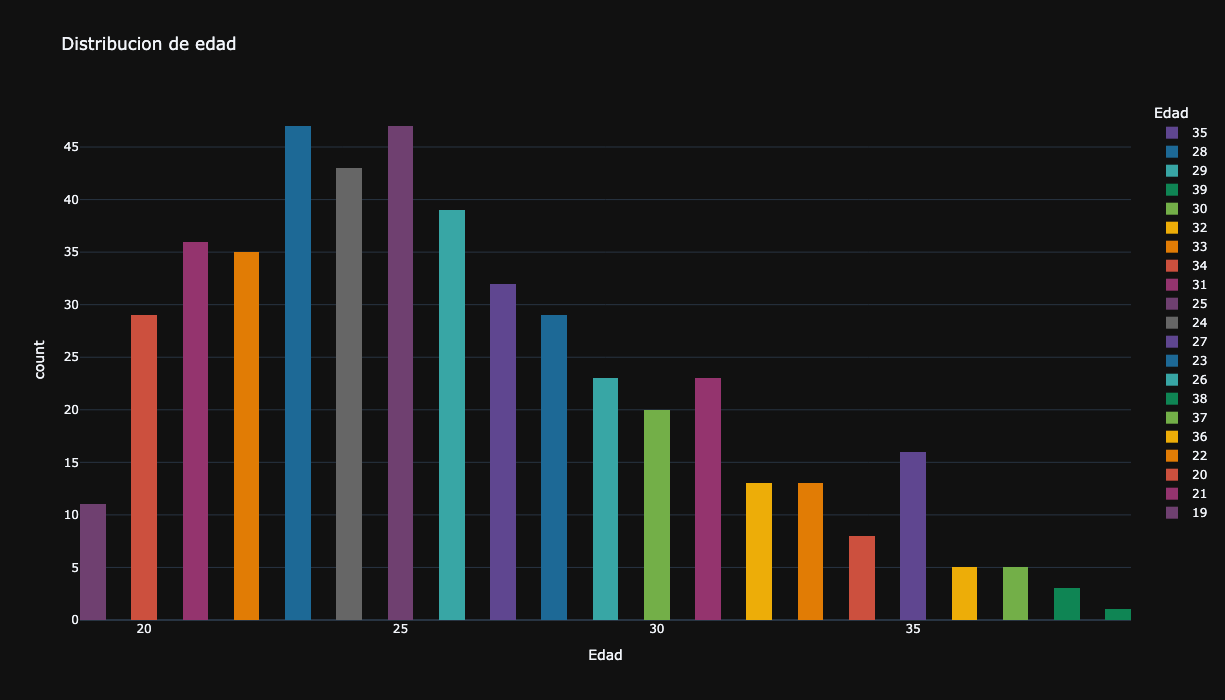

In [18]:
pio.templates.default = "plotly_dark"
fig = px.histogram(SS, x='agePlayer', 
                   title='Distribucion de edad',
                   labels={'agePlayer': 'Edad',},
                   color="agePlayer",
                   height=700, nbins = 100,
                   color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()


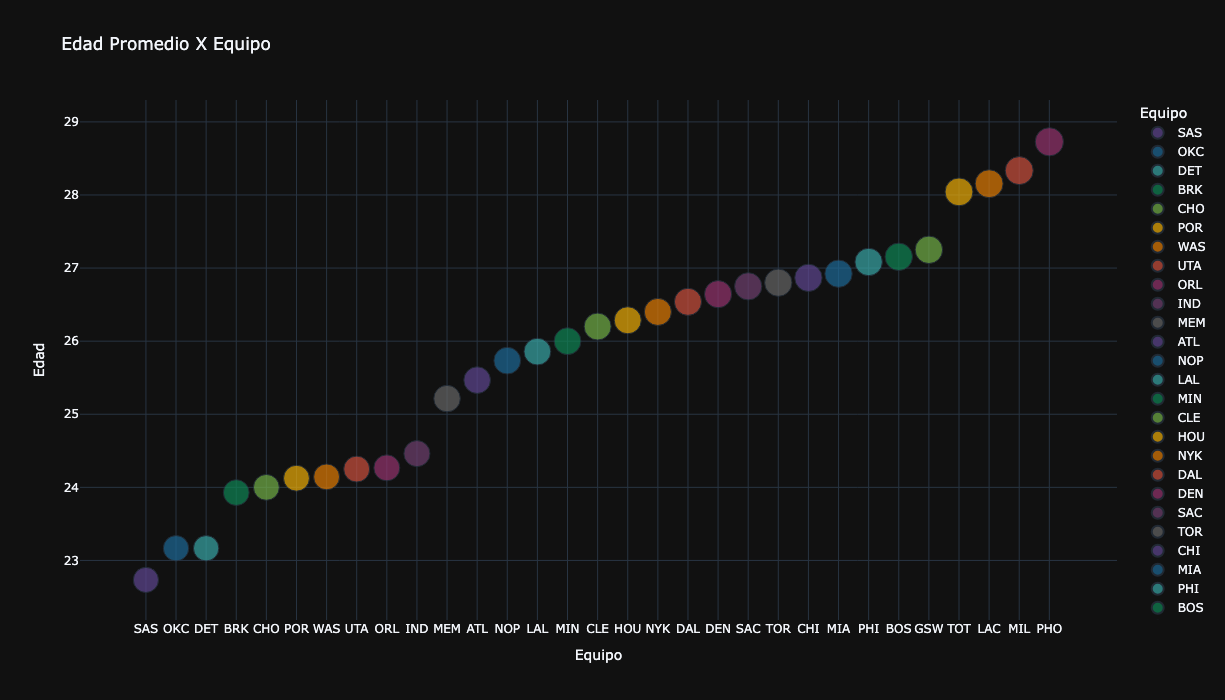

In [22]:
edad_promedio = SS.groupby('slugTeamBREF')['agePlayer'].mean().reset_index()
edad_promedio = edad_promedio.sort_values(by='agePlayer', ascending=True)

fig = px.scatter(edad_promedio, x='slugTeamBREF', y='agePlayer',
                 color = "slugTeamBREF", color_discrete_sequence=px.colors.qualitative.Prism,
                 labels={'agePlayer': 'Edad', 'slugTeamBREF' : 'Equipo'},
                 size = "agePlayer", height=700, title='Edad Promedio X Equipo',
)
fig.show()

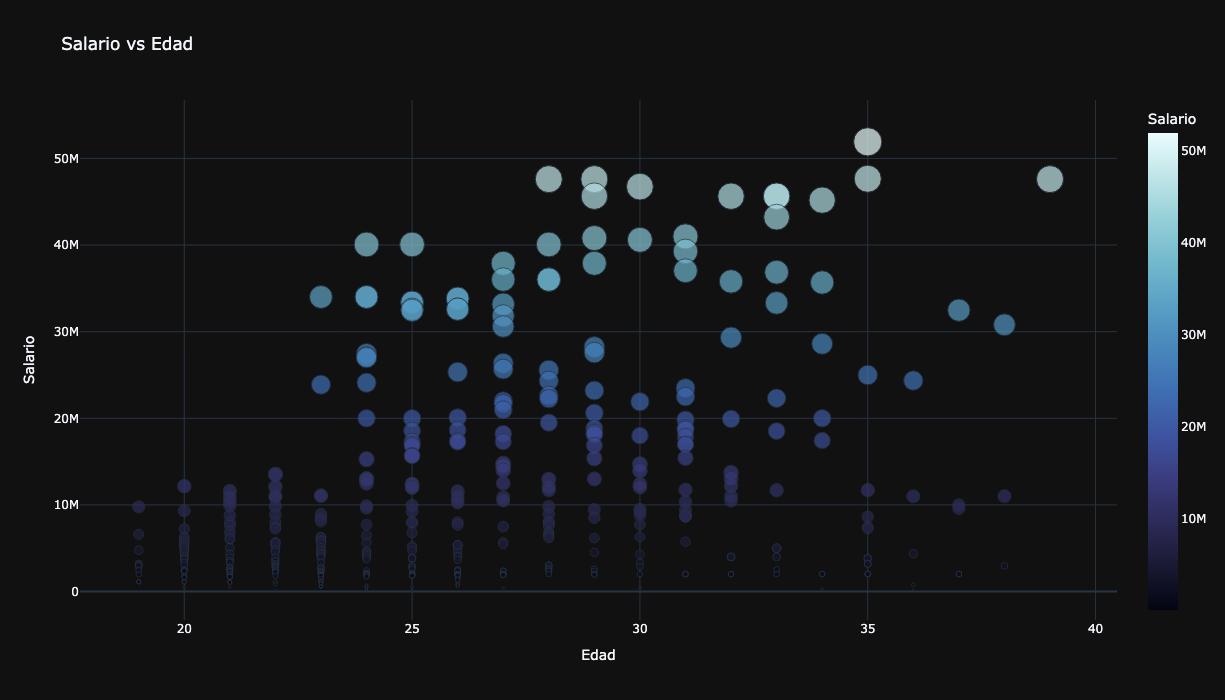

In [25]:
# Visualizar el salario de los jugadores de acuerdo a su edad
pio.templates.default = "plotly_dark"
fig = px.scatter(SS, x="agePlayer", y="Salary", color = "Salary",
                 title="Salario vs Edad",
                 labels={'Salary': 'Salario', 'agePlayer' : 'Edad'},
                 size='Salary', hover_data=['namePlayer','slugTeamBREF'], color_continuous_scale=px.colors.sequential.ice, height=700)
fig.show()

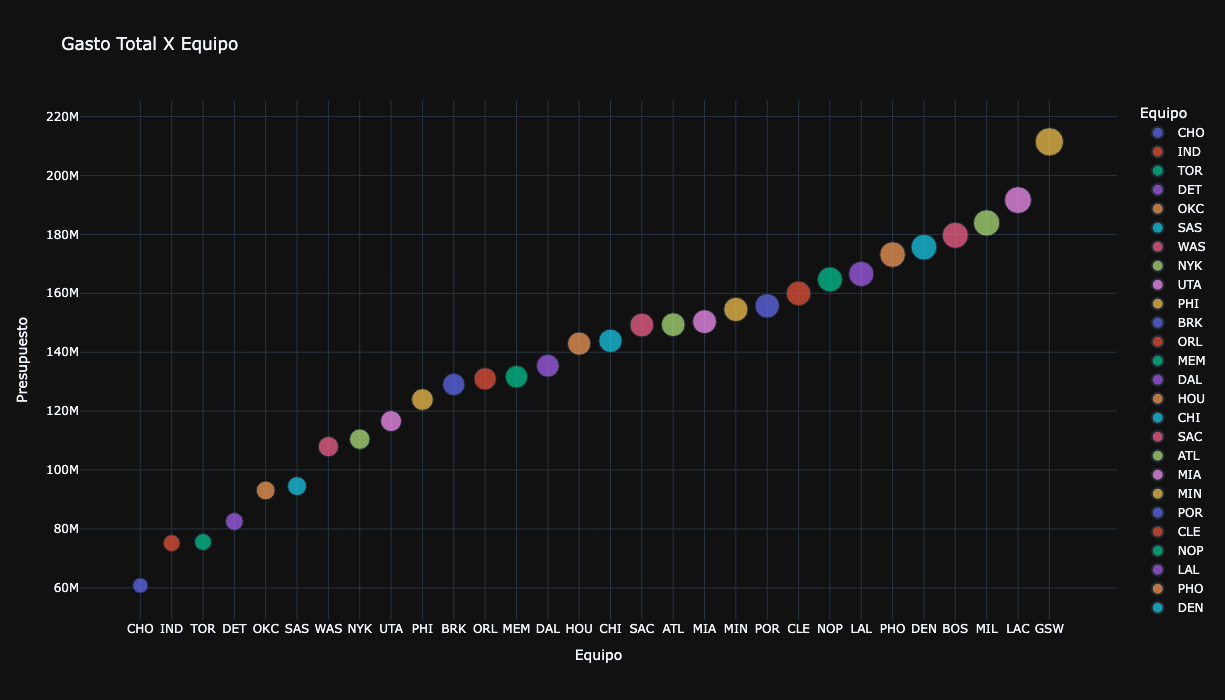

In [26]:
total_salary_per_team = SS.groupby('slugTeamBREF')['Salary'].sum().reset_index()
total_salary_per_team = total_salary_per_team.drop([28])
total_salary_per_team = total_salary_per_team.sort_values(by='Salary', ascending=True)
fig = px.scatter(total_salary_per_team, x='slugTeamBREF', y='Salary',
                 color = "slugTeamBREF", 
                 size = "Salary",                  
                 height=700,
                 title='Gasto Total X Equipo',
                 labels={'Salary': 'Presupuesto', 'slugTeamBREF' : 'Equipo'},
)
fig.show()

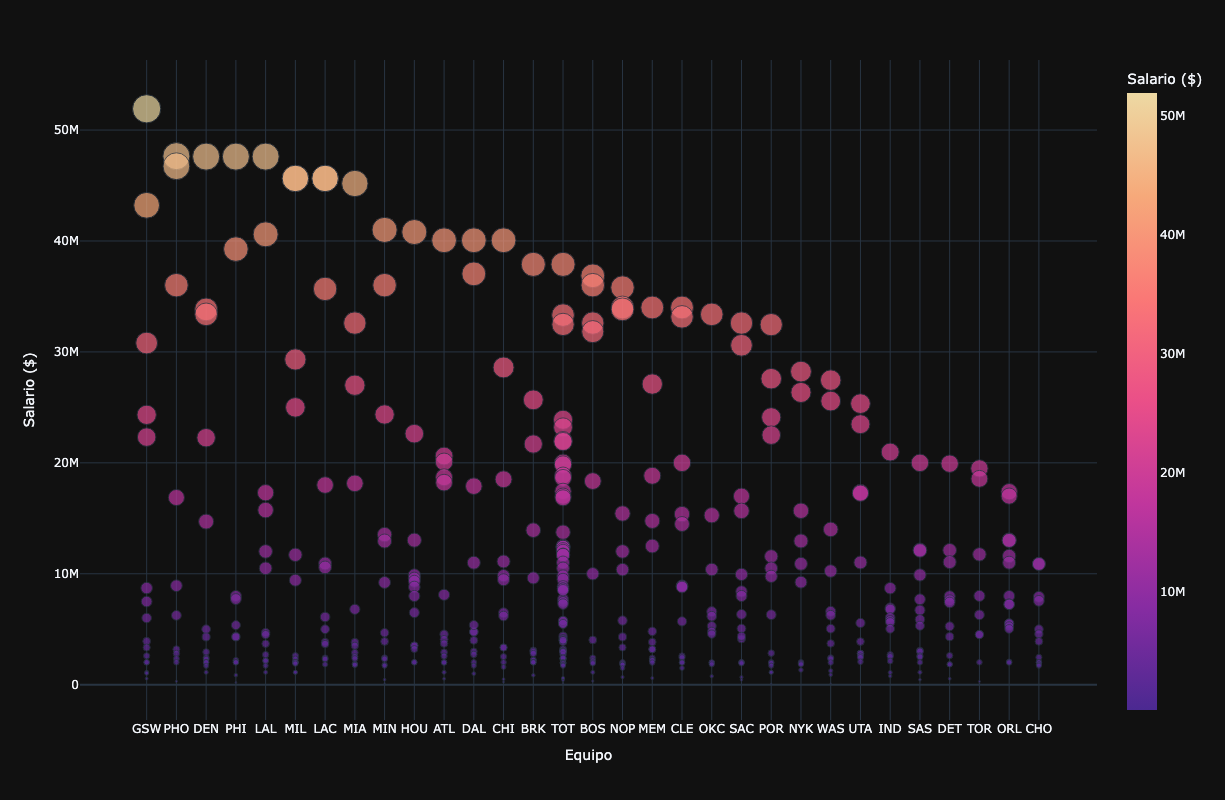

In [28]:
# Visualizar el salario de los jugadores por equipo
fig = px.scatter(SS, x="slugTeamBREF", y="Salary", color = "Salary",
                 size='Salary', hover_data=['namePlayer','slugTeamBREF'],
                 labels={'Salary': 'Salario ($)', 'slugTeamBREF': 'Equipo'},
                 color_continuous_scale=px.colors.sequential.Agsunset, height=800)
fig.show()

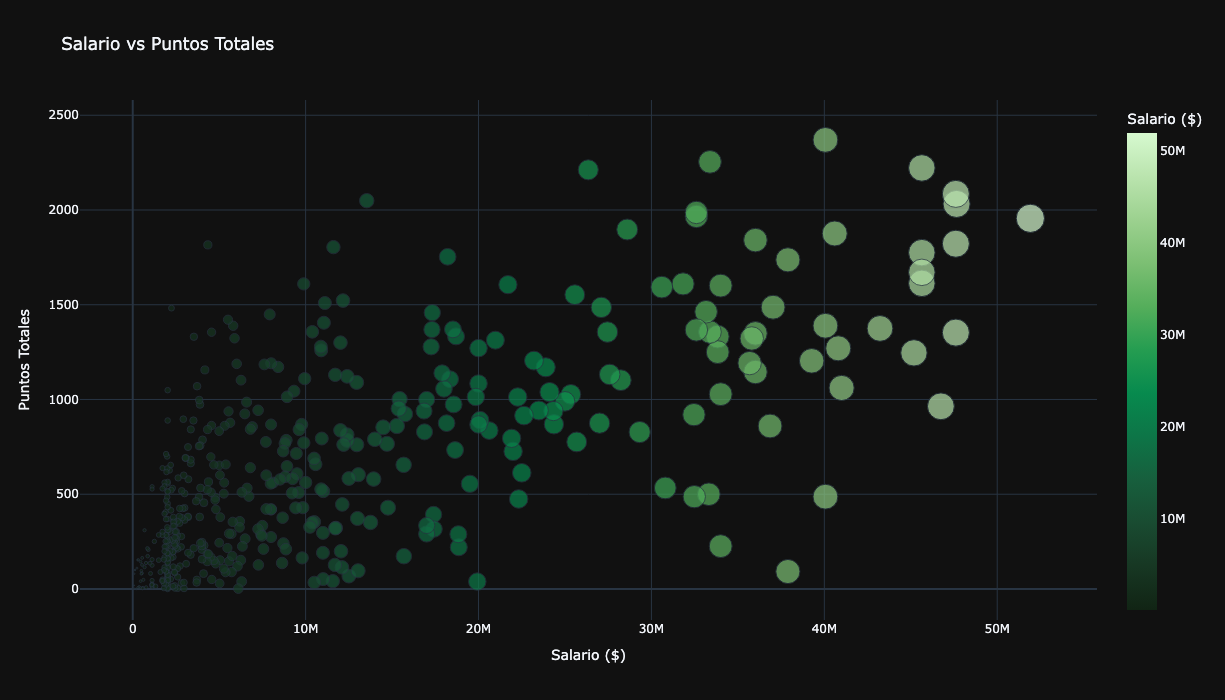

In [30]:
fig = px.scatter(SS, x='Salary', y='ptsTotals', 
                 title='Salario vs Puntos Totales',
                 labels={'Salary': 'Salario ($)', 'ptsTotals': 'Puntos Totales'},
                 size='Salary',color ="Salary", color_continuous_scale=px.colors.sequential.algae_r,              
                 hover_data=['namePlayer', 'slugTeamBREF', 'agePlayer'],
                 height=700)
fig.show()

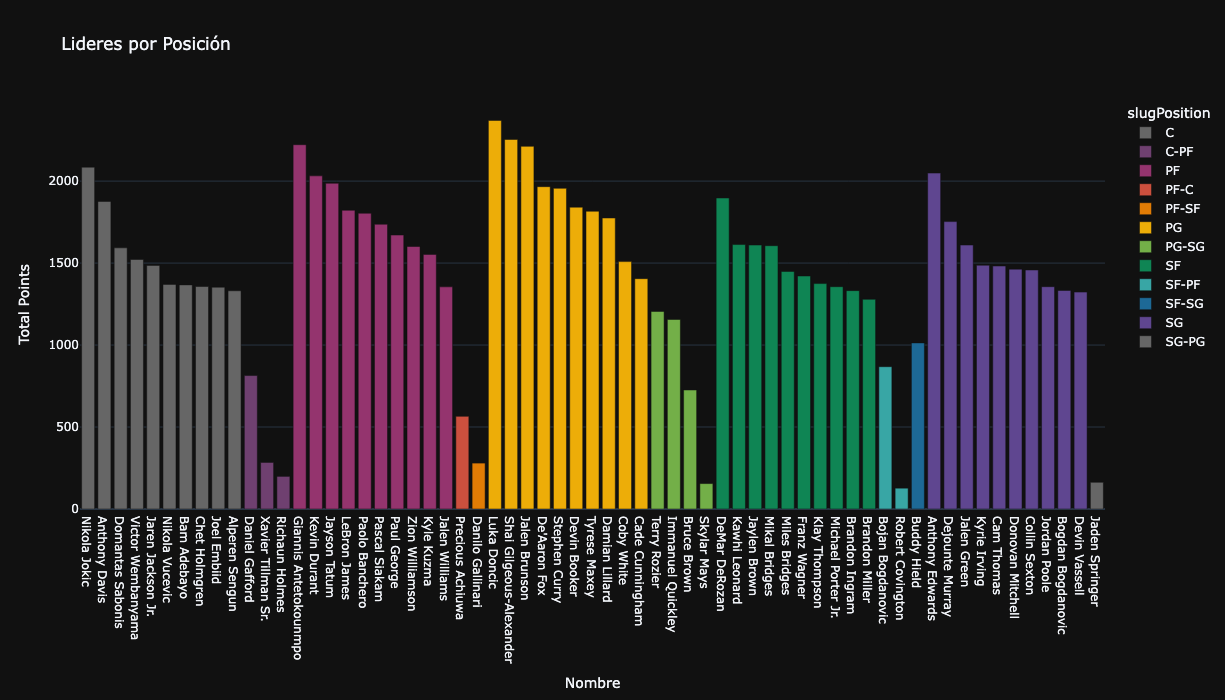

In [34]:
top_scorers = SS.groupby('slugPosition').apply(lambda x: x.nlargest(10, 'ptsTotals')).reset_index(drop=True)
fig = px.bar(top_scorers, x='namePlayer', y='ptsTotals', color='slugPosition', color_discrete_sequence=px.colors.qualitative.Prism_r,
             title='Lideres por Posición',
             labels={'namePlayer': 'Nombre', 'ptsTotals': 'Total Points'},height=700,
             hover_data=['slugTeamBREF'])
fig.update
fig.show()

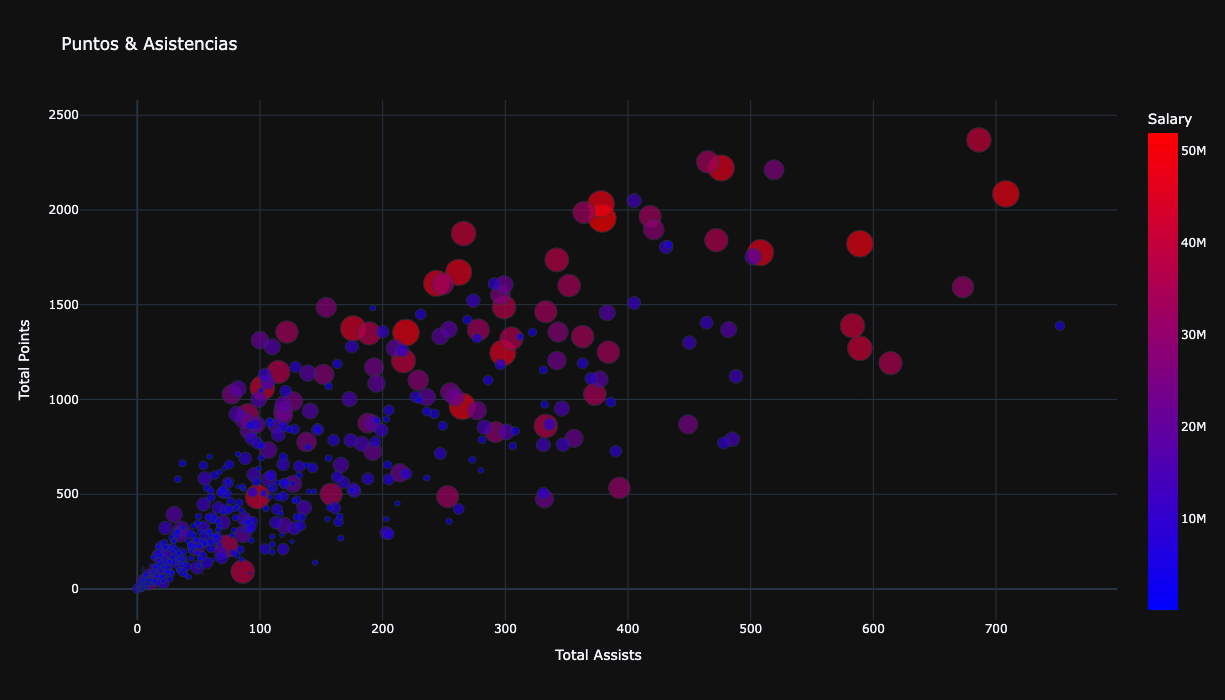

In [36]:
fig = px.scatter(SS, x='astTotals', y='ptsTotals', size='Salary', 
                 color='Salary', color_continuous_scale=px.colors.sequential.Bluered,
                 title='Puntos & Asistencias',
                 labels={'astTotals': 'Total Assists', 'ptsTotals': 'Total Points'},
                 hover_data=['namePlayer', 'slugTeamBREF', 'Salary',],height=700)
fig.show()


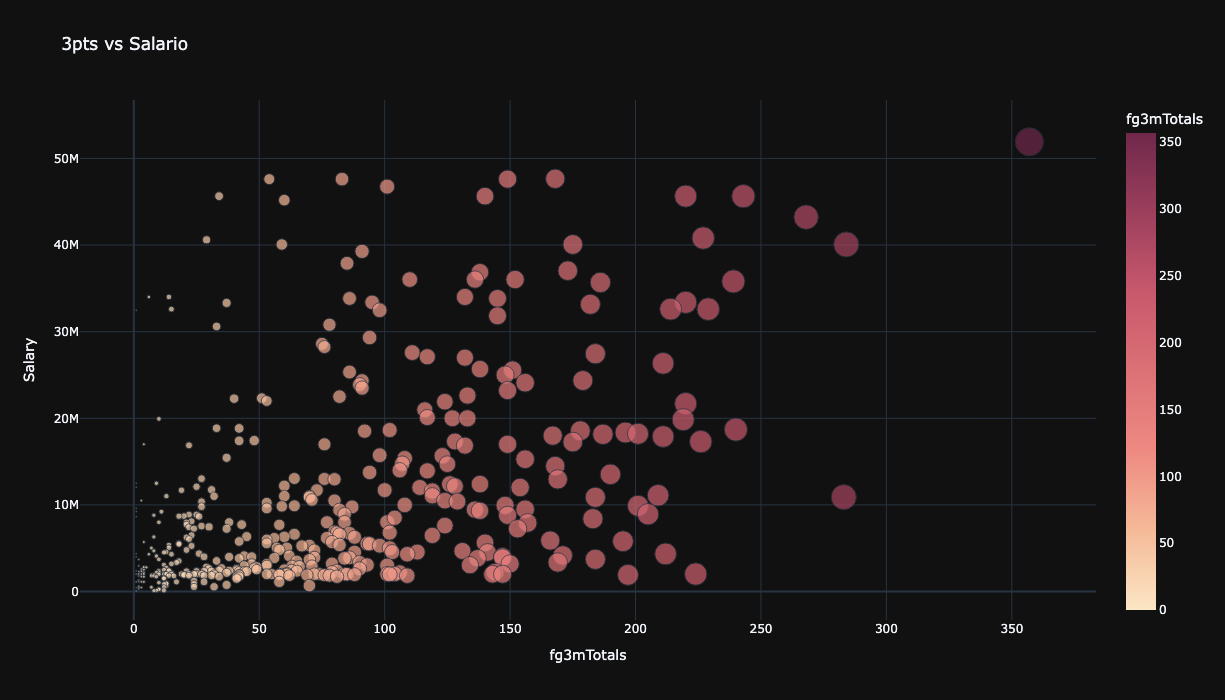

In [37]:
SS['CostPerPoint'] = SS['Salary'] / SS['ptsTotals']
fig = px.scatter(SS, x='fg3mTotals', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF','CostPerPoint'], 
                 color = "fg3mTotals", color_continuous_scale=px.colors.sequential.Burgyl,
                 size = "fg3mTotals",                 
                 height=700,
                 title='3pts vs Salario')
fig.show()

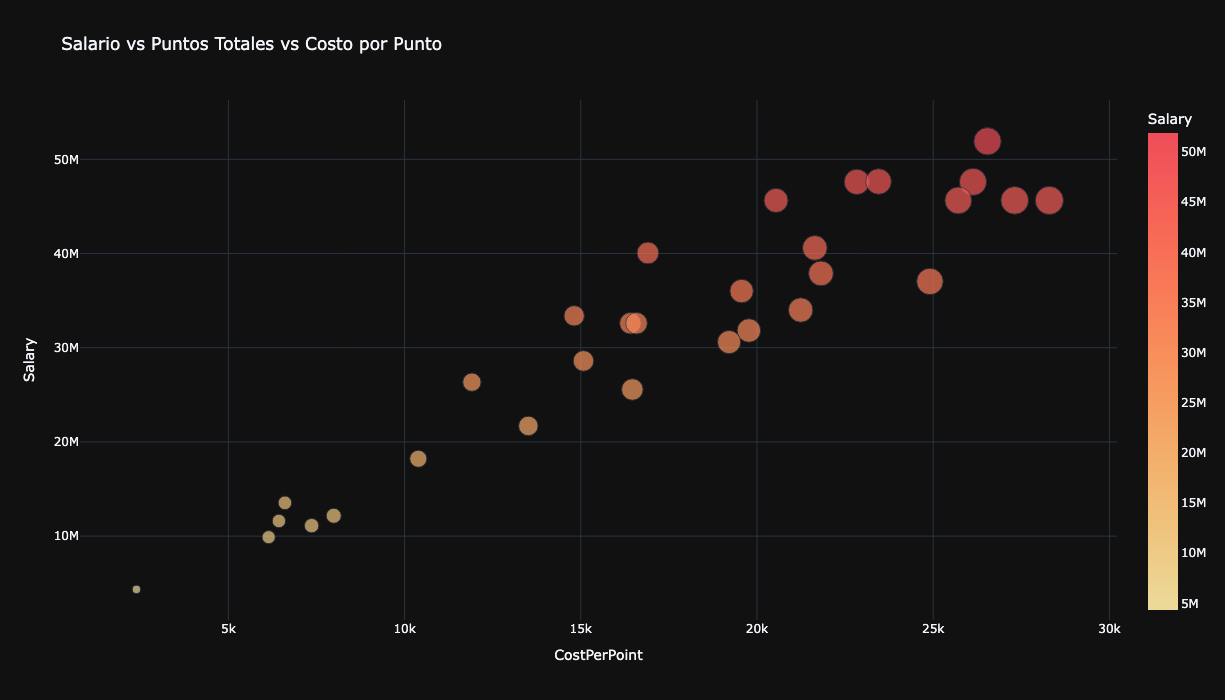

In [38]:
highest_cost_per_point = SS.sort_values(by='ptsTotals', ascending=False).head(30)
fig = px.scatter(highest_cost_per_point, x='CostPerPoint', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF','CostPerPoint'], 
                 title ="Salario vs Puntos Totales vs Costo por Punto",
                 color = "Salary", color_continuous_scale=px.colors.sequential.Oryel,
                 size = "CostPerPoint",
                 height=700)
fig.show()

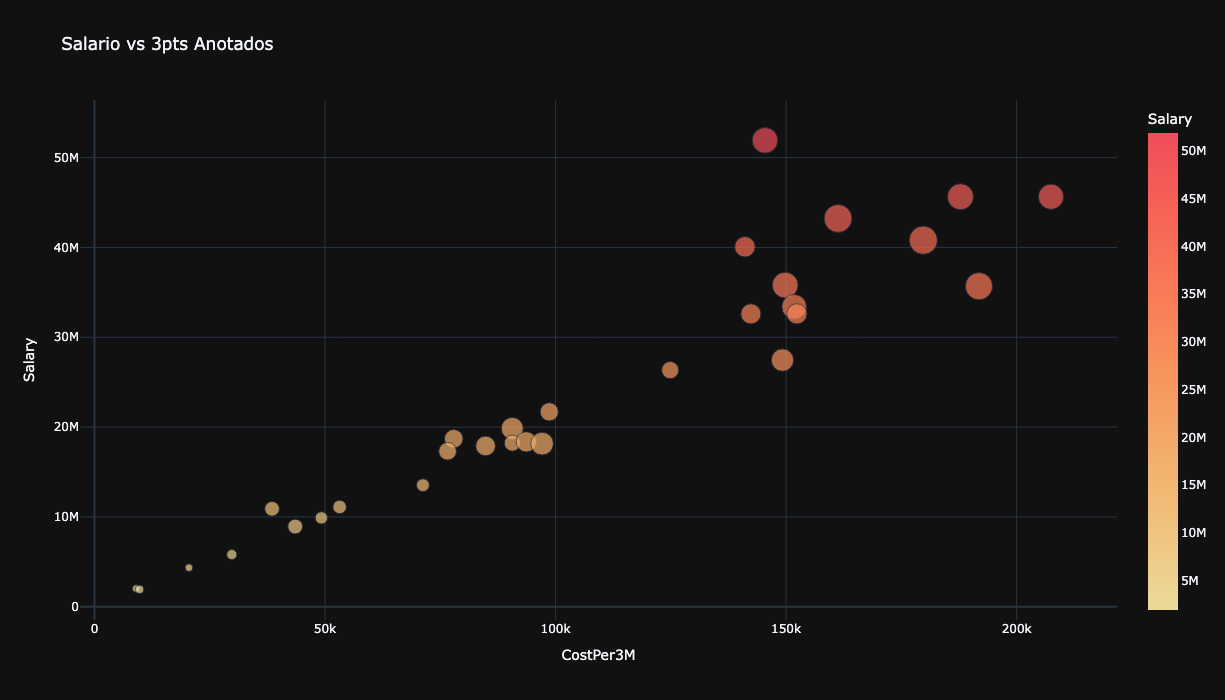

In [41]:
#calculo del costo por tres puntos
SS['CostPer3M'] = SS['Salary'] / SS['fg3mTotals']
#muestra los jugadores con mayor costo por tiro de 3 punto anotado
highest_cost_per_3 = SS.sort_values(by='fg3mTotals', ascending=False).head(30)
fig = px.scatter(highest_cost_per_3, x='CostPer3M', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF','CostPerPoint'], 
                 title ="Salario vs 3pts Anotados",
                 color = "Salary", color_continuous_scale=px.colors.sequential.Oryel,
                 size = "CostPerPoint",
                 height=700)
fig.show()

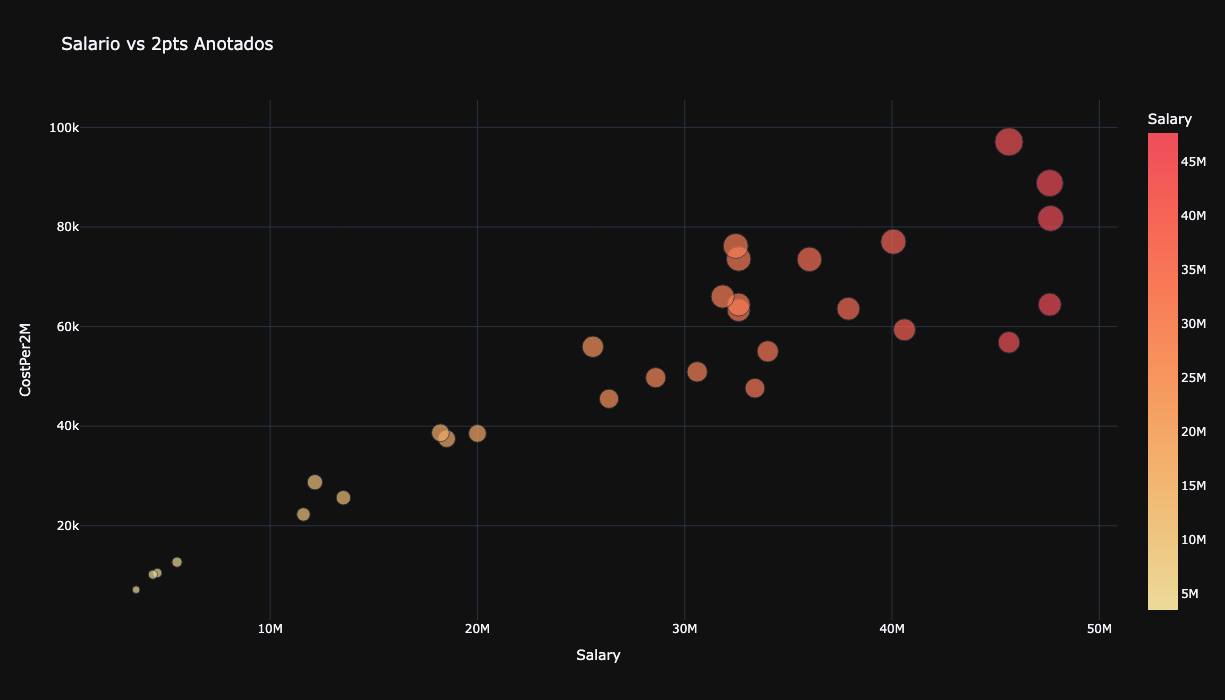

In [42]:
#calculo del costo por dos puntos
SS['CostPer2M'] = SS['Salary'] / SS['fg2mTotals']
#muestra los jugadores con mayor costo por tiro de 3 punto anotado
highest_cost_per_2 = SS.sort_values(by='fg2mTotals', ascending=False).head(30)
fig = px.scatter(highest_cost_per_2, x='Salary', y='CostPer2M',
                 hover_data=['namePlayer','slugTeamBREF','CostPerPoint'], 
                 title ="Salario vs 2pts Anotados",
                 color = "Salary", color_continuous_scale=px.colors.sequential.Oryel,
                 size = "CostPer2M",
                 height=700)
fig.show()

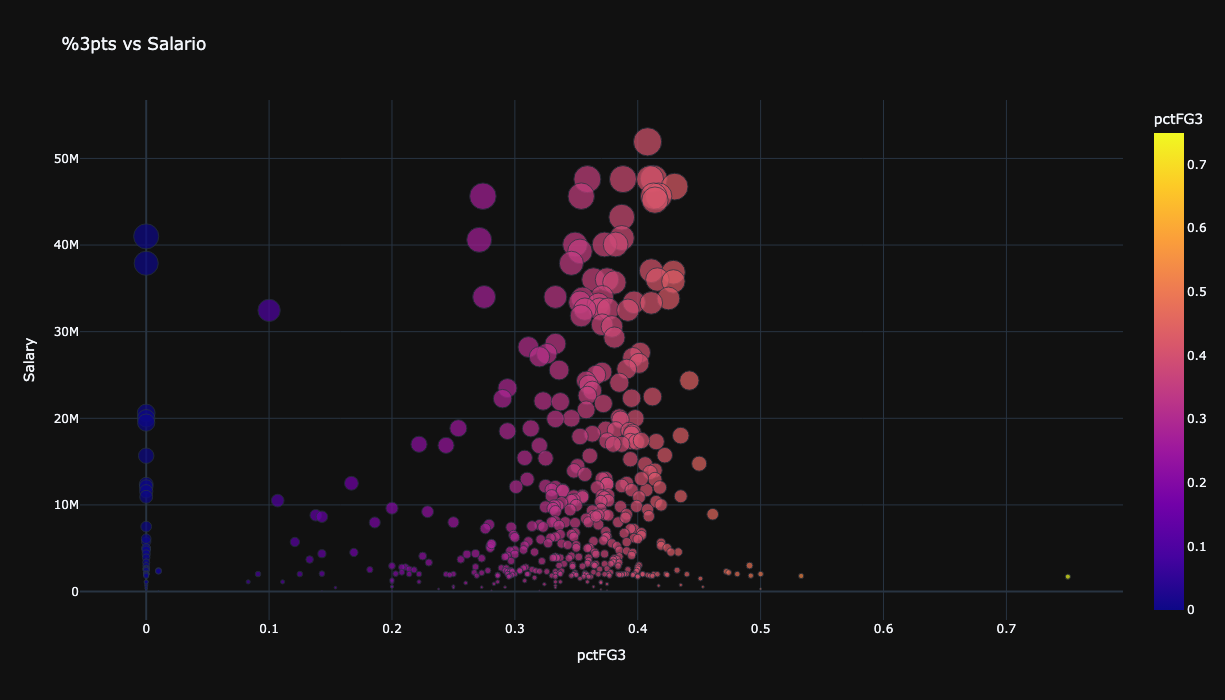

In [43]:
fig = px.scatter(SS, x='pctFG3', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF','CostPerPoint'], 
                 color = "pctFG3", color_continuous_scale=px.colors.sequential.Plasma,
                 size = "Salary",                 
                 height=700,
                 title='%3pts vs Salario',
)
fig.show()

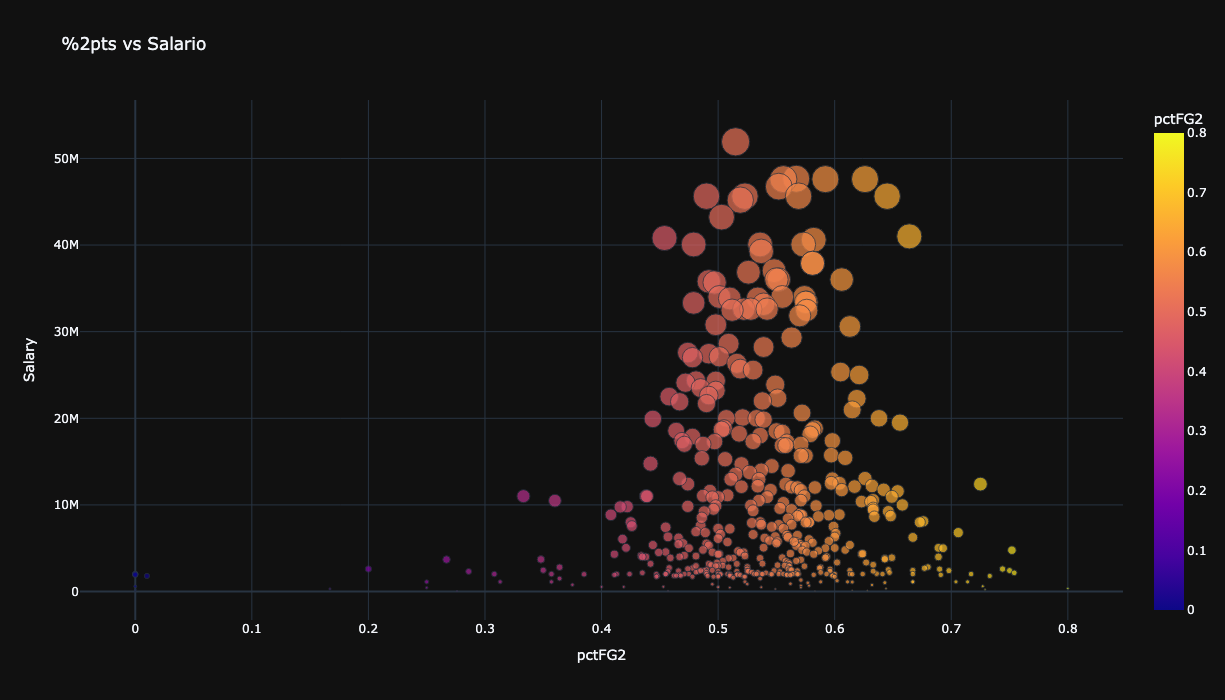

In [44]:
fig = px.scatter(SS, x='pctFG2', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF',], 
                 color = "pctFG2", color_continuous_scale=px.colors.sequential.Plasma,
                 size = "Salary",                 
                 height=700,
                 title='%2pts vs Salario',
)
fig.show()

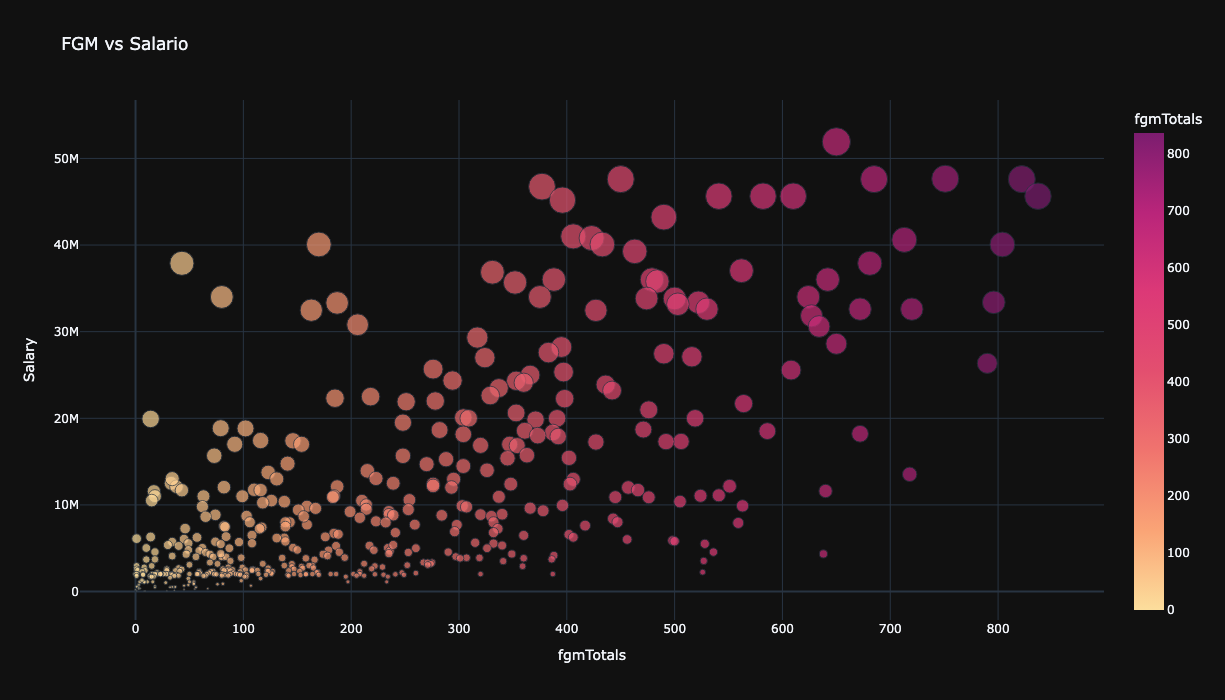

In [45]:
fig = px.scatter(SS, x='fgmTotals', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF'], 
                 color = "fgmTotals",color_continuous_scale=px.colors.sequential.Sunsetdark, 
                 size = "Salary",                  
                 height=700,
                 title='FGM vs Salario',
)
fig.show()

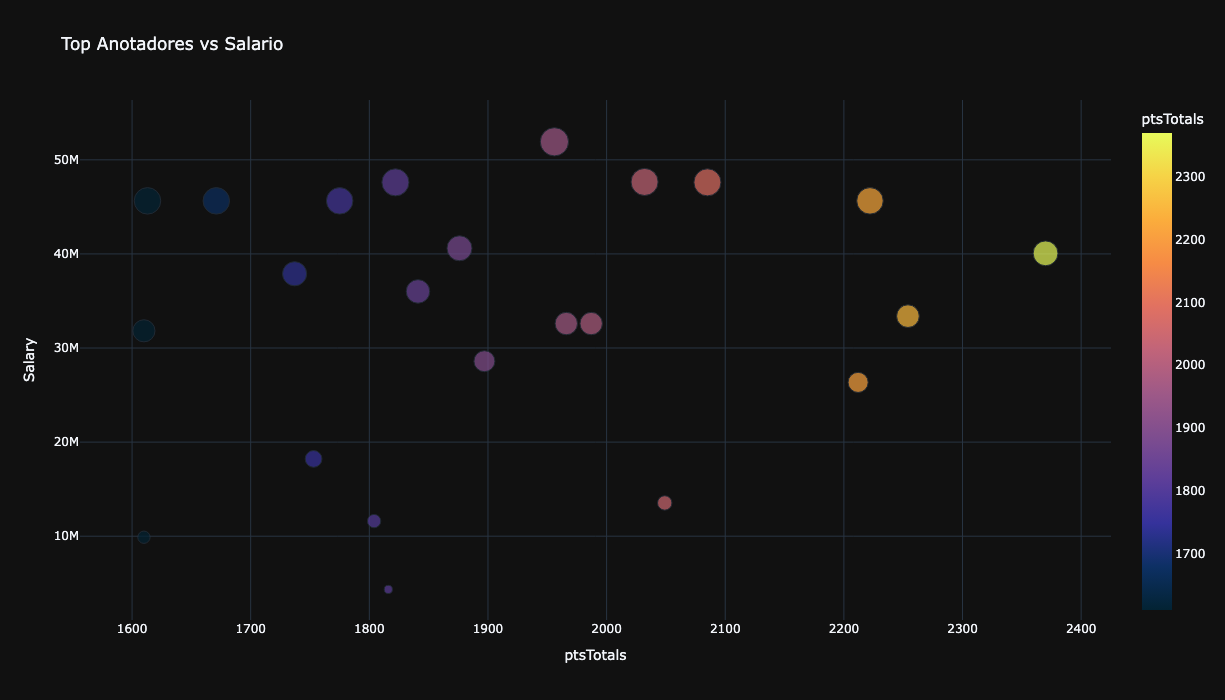

In [46]:
top_points = SS[['namePlayer', 'ptsTotals','slugPosition','slugTeamBREF','Salary']].sort_values(by='ptsTotals', ascending=False).head(23)
fig = px.scatter(top_points, x='ptsTotals', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF'], 
                 color = "ptsTotals",color_continuous_scale=px.colors.sequential.thermal, 
                 size = "Salary",                  
                 height=700,
                 title='Top Anotadores vs Salario',
)
fig.show()

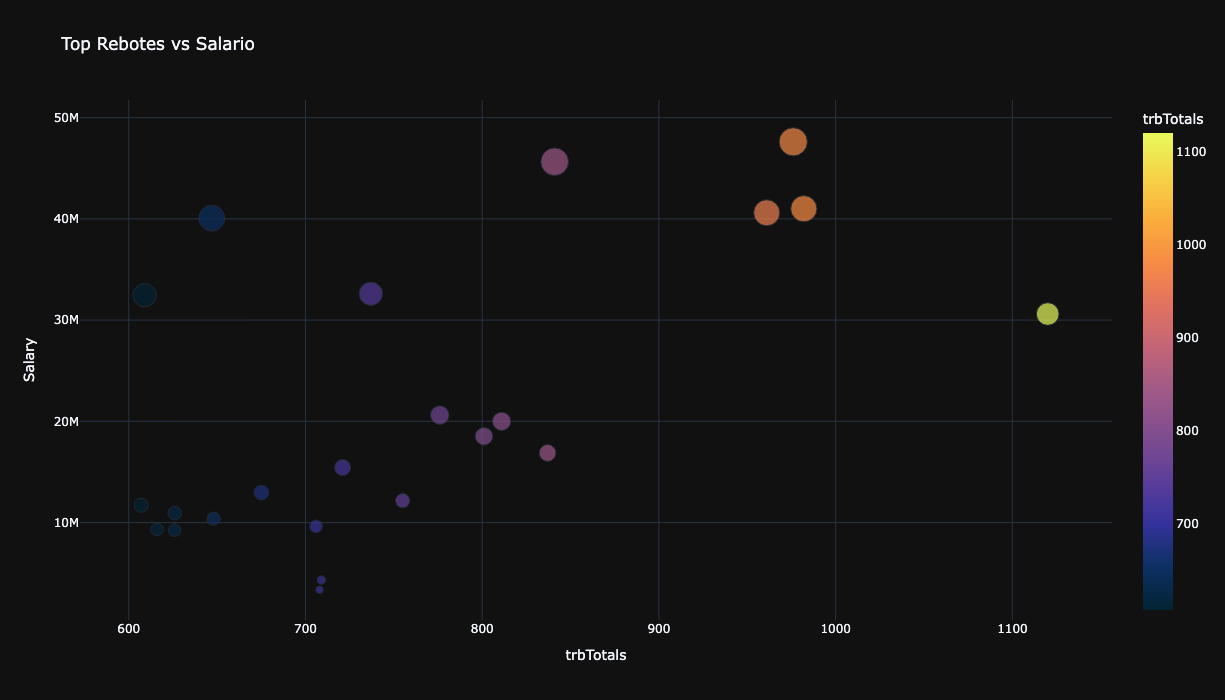

In [47]:
top_rebounds = SS[['namePlayer', 'trbTotals','slugPosition','slugTeamBREF','Salary']].sort_values(by='trbTotals', ascending=False).head(23)
fig = px.scatter(top_rebounds, x='trbTotals', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF'], 
                 color = "trbTotals",color_continuous_scale=px.colors.sequential.thermal, 
                 size = "Salary",                  
                 height=700,
                 title='Top Rebotes vs Salario',
)
fig.show()

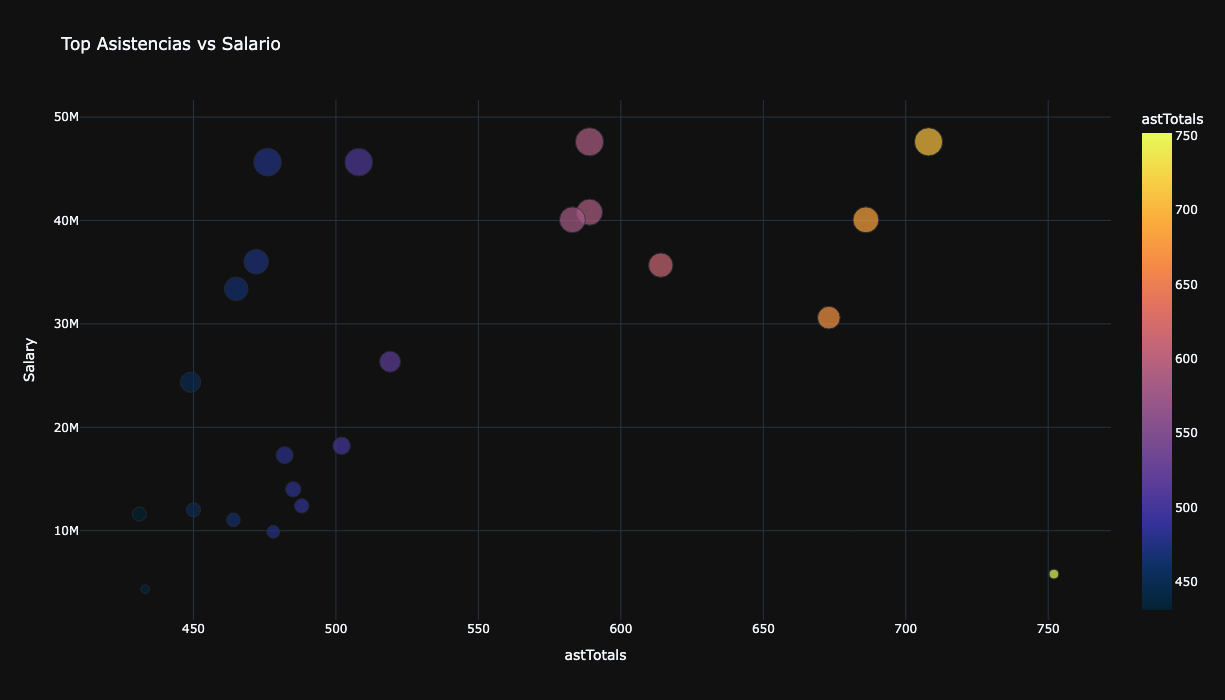

In [48]:
#calculo del top de asistencias
top_assists = SS[['namePlayer', 'astTotals','slugPosition','slugTeamBREF','Salary']].sort_values(by='astTotals', ascending=False).head(23)
fig = px.scatter(top_assists, x='astTotals', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF'], 
                 color = "astTotals",color_continuous_scale=px.colors.sequential.thermal, 
                 size = "Salary",                  
                 height=700,
                 title='Top Asistencias vs Salario',
)
fig.show()

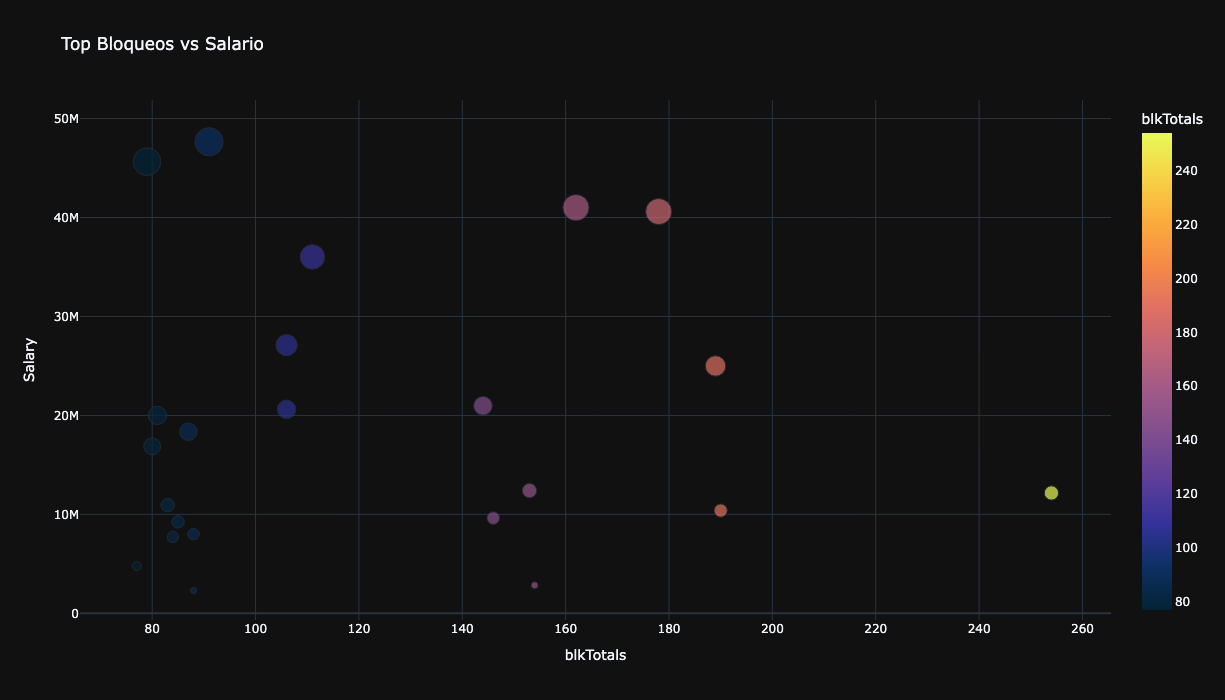

In [49]:
#calculo del top de bloqueos
top_blocks = SS[['namePlayer', 'blkTotals','slugPosition','slugTeamBREF','Salary']].sort_values(by='blkTotals', ascending=False).head(23)
fig = px.scatter(top_blocks, x='blkTotals', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF'], 
                 color = "blkTotals",color_continuous_scale=px.colors.sequential.thermal, 
                 size = "Salary",                  
                 height=700,
                 title='Top Bloqueos vs Salario')
fig.show()

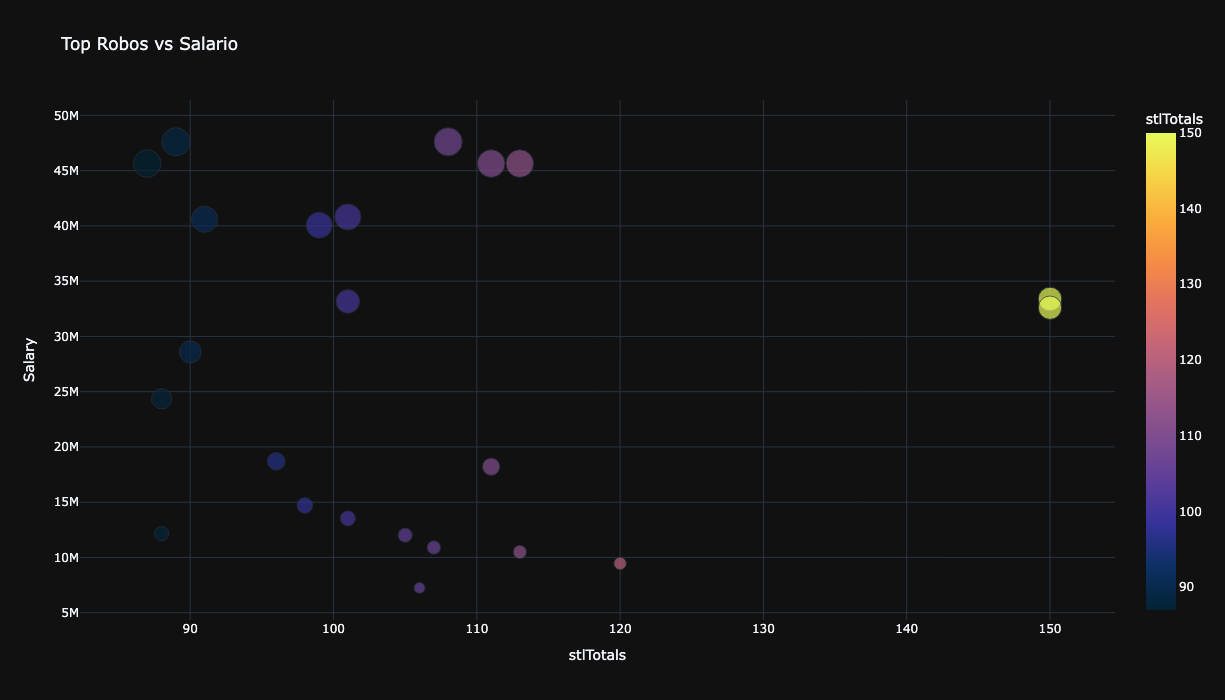

In [50]:
top_steals = SS[['namePlayer', 'stlTotals','slugPosition','slugTeamBREF','Salary']].sort_values(by='stlTotals', ascending=False).head(23)
fig = px.scatter(top_steals, x='stlTotals', y='Salary',
                 hover_data=['namePlayer','slugTeamBREF'], 
                 color = "stlTotals",color_continuous_scale=px.colors.sequential.thermal, 
                 size = "Salary",                  
                 height=700,
                 title='Top Robos vs Salario')
fig.show()